In [2]:
import numpy as np
import pykrige.kriging_tools as kt
from pykrige.ok import OrdinaryKriging

In [3]:
data = np.array([[0.3, 1.2, 0.47],
[1.9, 0.6, 0.56],
[1.1, 3.2, 0.74],
[3.3, 4.4, 1.47],
[4.7, 3.8, 1.74]])

In [4]:
gridx = np.arange(0.0, 5.5, 0.5)
gridy = np.arange(0.0, 5.5, 0.5)

In [5]:
OK = OrdinaryKriging(data[:, 0], data[:, 1], data[:, 2], variogram_model='linear',
verbose=False, enable_plotting=False)

In [7]:
z,ss = OK.execute('grid', gridx, gridy)
kt

<module 'pykrige.kriging_tools' from '/home/yiyi/anaconda3/envs/nlp/lib/python3.6/site-packages/pykrige/kriging_tools.py'>

In [9]:
! python -c 'import pyKriging'

Now_optimizing_for_q = 1 

Now_optimizing_for_q = 2 

Now_optimizing_for_q = 5 

Now_optimizing_for_q = 10 

Now_optimizing_for_q = 20 

Now_optimizing_for_q = 50 

Now_optimizing_for_q = 100 

Best_lh_found_using_q = 5 

Infill iteration 1 of 5....
Infill iteration 2 of 5....
Infill iteration 3 of 5....
Infill iteration 4 of 5....
Infill iteration 5 of 5....


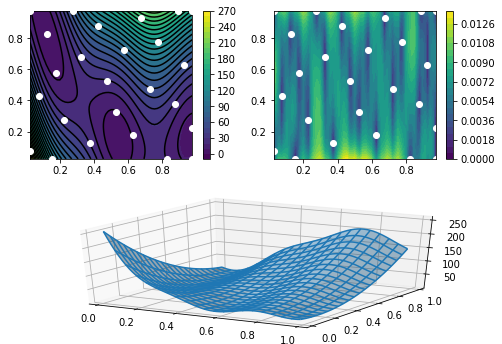

In [11]:
import pyKriging  
from pyKriging.krige import kriging  
from pyKriging.samplingplan import samplingplan

# The Kriging model starts by defining a sampling plan, we use an optimal Latin Hypercube here
sp = samplingplan(2)  
X = sp.optimallhc(20)

# Next, we define the problem we would like to solve
testfun = pyKriging.testfunctions().branin  
y = testfun(X)

# Now that we have our initial data, we can create an instance of a Kriging model
k = kriging(X, y, testfunction=testfun, name='simple')  
k.train()

# Now, five infill points are added. Note that the model is re-trained after each point is added
numiter = 5  
for i in range(numiter):  
    print( 'Infill iteration {0} of {1}....'.format(i + 1, numiter))
    newpoints = k.infill(1)
    for point in newpoints:
        k.addPoint(point, testfun(point)[0])
    k.train()

# And plot the results
k.plot()  